In [1]:
from sklearn.datasets import fetch_openml

mnist_= fetch_openml("mnist_784", version=1)

In [2]:
X, y = mnist_["data"], mnist_["target"]
X[0] #This is our instance's feature vector
some_digit = X[0] 
some_digit_img = some_digit.reshape(28,28) #convert our vector into a matrix 
some_digit_img



array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

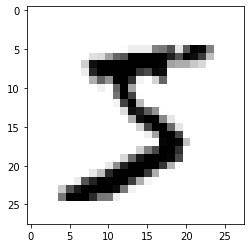

'5'

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.imshow(some_digit_img, cmap="binary")
plt.show()
y[0]

In [4]:
import numpy as np
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]



In [5]:
#Training a Binary classifier
#we want to know if the number is 5 or not 5

#Target vectors
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

#Let's use a Sctochastic Gradient desceny (SGD) classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42) #Instance the SGDClassifier
sgd_clf.fit(X_train, y_train_5) #We train our model 



SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [6]:
#Let's predict!
sgd_clf.predict([some_digit]) #Our some_digit variable is 5

array([ True])

In [7]:
#Preformance Measures

#Measuring accuracy using cross-validaition 

#Let's implement cross-validation roughly 
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone 

skfold = StratifiedKFold(n_splits=3, random_state=42)

#skfold.split() returns arrays of indexes!
#In this case skfold.split will split our data 3 times, each one with a
#different combination of indexes 
#a, b, c = skfold.split(X_train, y_train_5) #a, b and c have two arrays
                                           #one of the indexes of train split
                                           #one of indexes of test split


for train_idx, test_idx in skfold.split(X_train, y_train_5):
    
    sgd_clf_clone = clone(sgd_clf)
    X_train_fold = X_train[train_idx]
    y_train_fold = y_train_5[train_idx]
    
    X_test_fold = X_train[test_idx]
    y_test_fold = y_train_5[test_idx]
    
    
    sgd_clf_clone.fit(X_train_fold, y_train_fold)
    y_pred = sgd_clf_clone.predict(X_test_fold)
    
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))
    

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.95035
0.96035
0.9604


In [8]:
#Let's use cross_val_score() to evaluate SGDClassifier model

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [9]:
#let's look at a dumb classifier that classifies every image as not 5
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):

  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

#We can see that, accuracy generally is not the preferred preformance measure 
#for classifiers, especially when we have skewed datasets
#(i.e. when some classes are much mor frequent than others) 
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [10]:
#Let's use confussion matrix in order to measure the preformance of our model
#we need a vector of predictions to compare it with our labels
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [11]:
from sklearn.metrics import confusion_matrix
#Each row itself is the actual class (i.e non-5 and 5s)
#Each column is the predicted class (i.e how many were false, how many 
#                                     were true, etc)
conf_matrix = confusion_matrix(y_train_5, y_train_pred)
conf_matrix


array([[53892,   687],
       [ 1891,  3530]])

In [12]:
#let's pretend all the predictions are correct
y_train_perfect_pred = y_train_5
confusion_matrix(y_train_5, y_train_perfect_pred)
#Values of our matrix are:
#[True negatives, False positives], ///this is for our negative class(non-5)
#[False negatives, True positives]  ///this is for our positive class(5s)

array([[54579,     0],
       [    0,  5421]])

In [13]:
#Precision and recall (another way to measure classifier preformance)
from sklearn.metrics import precision_score, recall_score
#Equation for Precision
# True positives / (True positives + False positives)
# TP/(TP + FP)
print(precision_score(y_train_5, y_train_pred))
#When the model says that the number is a 5, this is correct 83% of the times

#Equation for Recall 
#True positives / (True Positives + False Negatives)
# TP/(TP + FN)
print(recall_score(y_train_5, y_train_pred))
#The model only can catch 65% of the 5s



0.8370879772350012
0.6511713705958311


In [14]:
#It is convenient to combine both precision and recall into a single metric called
#F1 score
#this is the harmonic mean between precision and recall
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)
#The f1 score favors classifiers that have similar precision and recall values
#There could be the case where you don't want that type of classifier 

#A Huge precision value means that if it predict a positive value, surely it will be
# a true (True positive) one BUT it will miss a lot of positive values (False negatives)

#A Huge recall value means that our classifier will take almost all or all the 
#positive values (True positives) BUT it also will take a lot of negative values
#(False positives) 

0.7325171197343846

In [22]:
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)
threshold = 0
y_some_digit_predict = (y_scores > threshold )
y_some_digit_predict #predicts a True positive!



[2164.22030239]


array([ True])

In [24]:
#raising the threshold the recall value is reduced
threshold = 3000
y_some_digit_predict = (y_scores > threshold)
y_some_digit_predict #predicts a False negative!


array([False])

In [27]:
#Let's decide wich threshold use 
#first have an array with all the scores of all the instances in the training set
#specifying that we want the decision scores
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [28]:

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve()



In [132]:
#Now let's plot our precisions and recalls as functions of the threshold value

def plot_decision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision" )
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  plt.grid(which="both")
  plt.legend()
  plt.xlim(-50000,50000)
  plt.ylim(0,1)
  plt.xlabel("Threshold")
  plt.xticks([-40000,-20000,0, 20000, 40000])

def plot_precision_vs_recall(Precisions, Recalls):
  plt.plot(Recalls[:-1], Precisions[:-1], "b--", label="Precision" )
 
  plt.grid(which="both")
  plt.legend()
  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.xlabel("Recall")
  plt.ylabel("Precision")
  

 

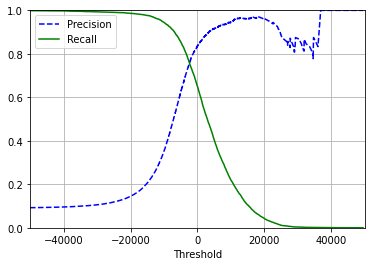

In [135]:
plot_decision_recall_vs_threshold(precisions, recalls, thresholds)
#plot_precision_vs_recall(precisions, recalls)
plt.show()

In [138]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision
y_train_pred_90 = (y_scores >= threshold_90_precision)


In [140]:
print(precision_score(y_train_5, y_train_pred_90))

print(recall_score(y_train_5, y_train_pred_90))

0.9000345901072293
0.4799852425751706
